In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/facebook_ads_data.csv')
print(df)

         ad_date campaign_name  total_spend  total_impressions  total_clicks  \
0     2022-11-05     Expansion         0.00                  0             0   
1     2022-11-01     Expansion         0.00                  0             0   
2     2022-10-31     Expansion       227.45               6054            58   
3     2022-10-30     Expansion       335.91              27562            69   
4     2022-10-29     Expansion       714.03              33358           115   
...          ...           ...          ...                ...           ...   
1489  2020-11-15     Discounts         6.98              12465           657   
1490  2020-11-14     Discounts         7.27               5005           392   
1491  2020-11-13     Discounts         6.36              11669           451   
1492  2020-11-12     Discounts        23.00              10473           397   
1493  2020-11-11     Discounts         1.89               1800            45   

      total_value   cpc    cpm       ct

In [ ]:
 # Convert the 'ad_date' column to datetime format
df['ad_date'] = pd.to_datetime(df['ad_date'])

In [ ]:
# Filter the data for the year 2021
df_2021 = df[df['ad_date'].dt.year == 2021]
print(df_2021)

        ad_date campaign_name  total_spend  total_impressions  total_clicks  \
274  2021-12-31     Lookalike       143.19              24699           194   
275  2021-12-31        Trendy         8.82              25345            63   
276  2021-12-31     Wholesale        21.37               6705            24   
277  2021-12-30     Lookalike       227.56              44527           897   
278  2021-12-30        Trendy        31.92               8833            58   
...         ...           ...          ...                ...           ...   
1436 2021-01-05     Discounts        81.15              60232          1379   
1437 2021-01-04     Discounts        70.06              22440          1256   
1438 2021-01-02     Discounts         7.74              10709           205   
1439 2021-01-01         Brand         0.39                353             0   
1440 2021-01-01     Discounts         0.00                  0             0   

      total_value   cpc   cpm       ctr      romi  

In [ ]:
# 1. Group the data by date and calculate the total spend and ROMI
grouped_daily = df_2021.groupby('ad_date').agg({'total_spend': 'sum', 'romi': 'mean'}).reset_index()
print(grouped_daily)

       ad_date  total_spend      romi
0   2021-01-01         0.39  1.512821
1   2021-01-02         7.74  0.891473
2   2021-01-04        70.06  0.977305
3   2021-01-05        81.15  0.760074
4   2021-01-06       142.77  1.011212
..         ...          ...       ...
324 2021-12-27       478.31  1.412261
325 2021-12-28       359.83  1.392740
326 2021-12-29       163.25  1.263469
327 2021-12-30       285.67  1.320858
328 2021-12-31       173.38  1.375691

[329 rows x 3 columns]


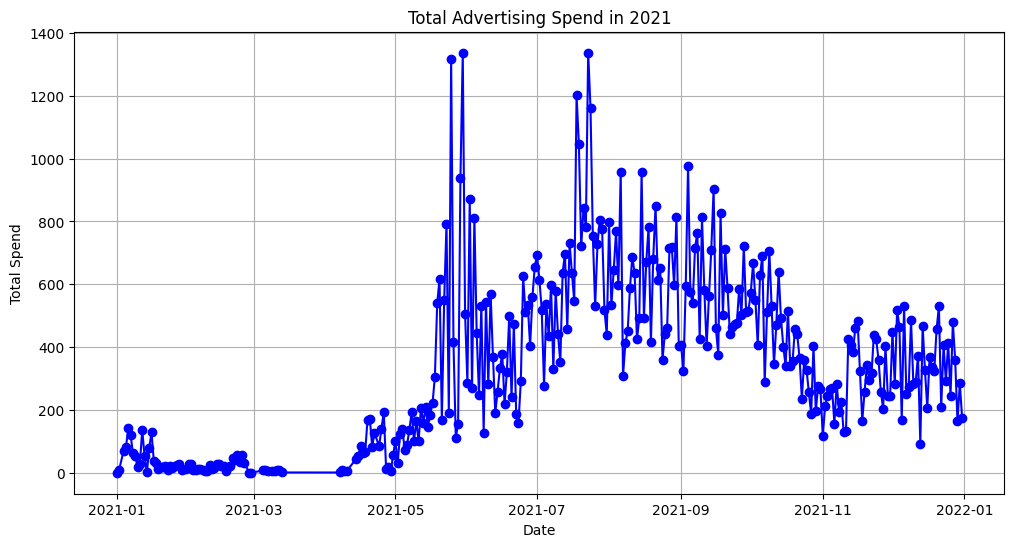

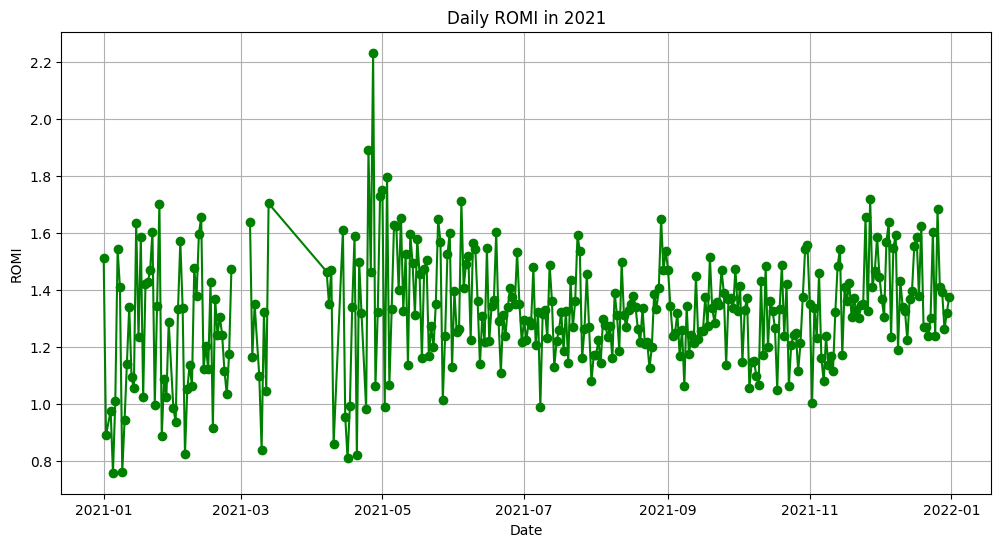

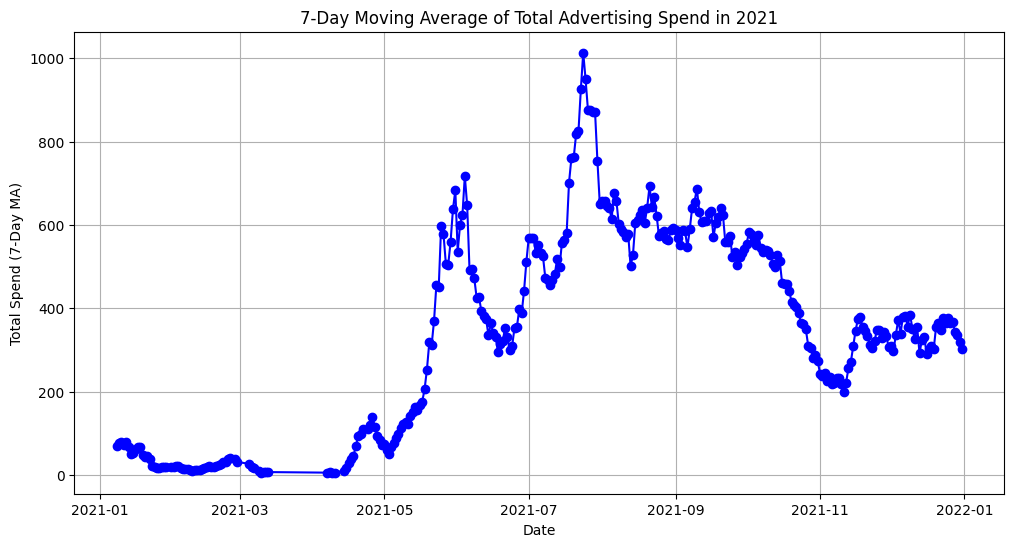

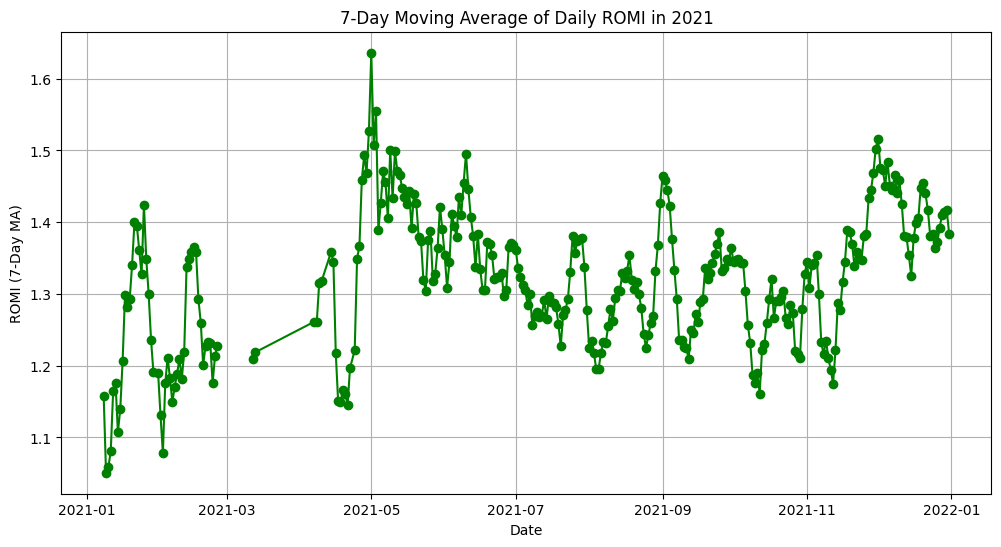

In [ ]:
# Plotting the total spend in 2021
plt.figure(figsize=(12, 6))
plt.plot(grouped_daily['ad_date'], grouped_daily['total_spend'], marker='o', linestyle='-', color='b')
plt.title('Total Advertising Spend in 2021')
plt.xlabel('Date')
plt.ylabel('Total Spend')
plt.grid(True)
plt.show()

# Plotting the daily ROMI in 2021
plt.figure(figsize=(12, 6))
plt.plot(grouped_daily['ad_date'], grouped_daily['romi'], marker='o', linestyle='-', color='g')
plt.title('Daily ROMI in 2021')
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.grid(True)
plt.show()

# Bonus: Rolling average
grouped_daily['total_spend_ma'] = grouped_daily['total_spend'].rolling(window=7).mean()
grouped_daily['romi_ma'] = grouped_daily['romi'].rolling(window=7).mean()

# Plotting the moving average of total spend in 2021
plt.figure(figsize=(12, 6))
plt.plot(grouped_daily['ad_date'], grouped_daily['total_spend_ma'], marker='o', linestyle='-', color='b')
plt.title('7-Day Moving Average of Total Advertising Spend in 2021')
plt.xlabel('Date')
plt.ylabel('Total Spend (7-Day MA)')
plt.grid(True)
plt.show()

# Plotting the moving average of daily ROMI in 2021
plt.figure(figsize=(12, 6))
plt.plot(grouped_daily['ad_date'], grouped_daily['romi_ma'], marker='o', linestyle='-', color='g')
plt.title('7-Day Moving Average of Daily ROMI in 2021')
plt.xlabel('Date')
plt.ylabel('ROMI (7-Day MA)')
plt.grid(True)
plt.show()

      campaign_name  total_spend      romi
0             Brand       539.92  1.241293
1   Crazy discounts      2175.29  1.208851
2         Discounts      2856.39  1.247111
3       Electronics     23920.42  1.225274
4         Expansion     67212.82  1.237941
5           Hobbies     11326.97  1.238967
6         Lookalike     63631.09  1.245056
7         New items      2936.97  1.279135
8            Promos      4993.84  1.751932
9            Trendy      1992.31  1.840145
10        Wholesale     14181.71  1.239026


<ipython-input-10-3e2837c393fd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_campaign, x='campaign_name', y='total_spend', palette='Blues_d')


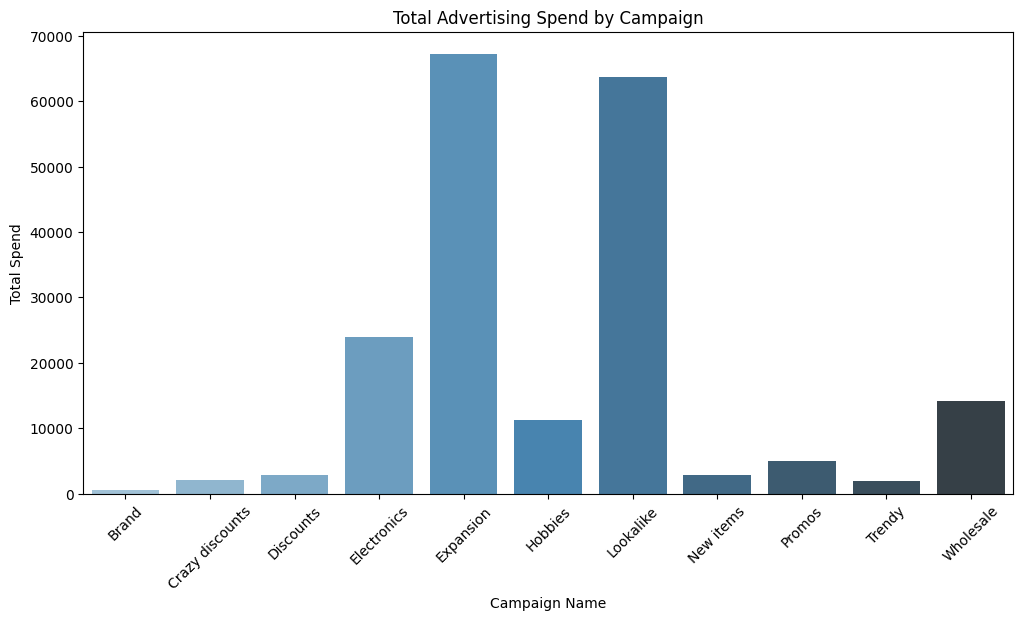

<ipython-input-10-3e2837c393fd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_campaign, x='campaign_name', y='romi', palette='Greens_d')


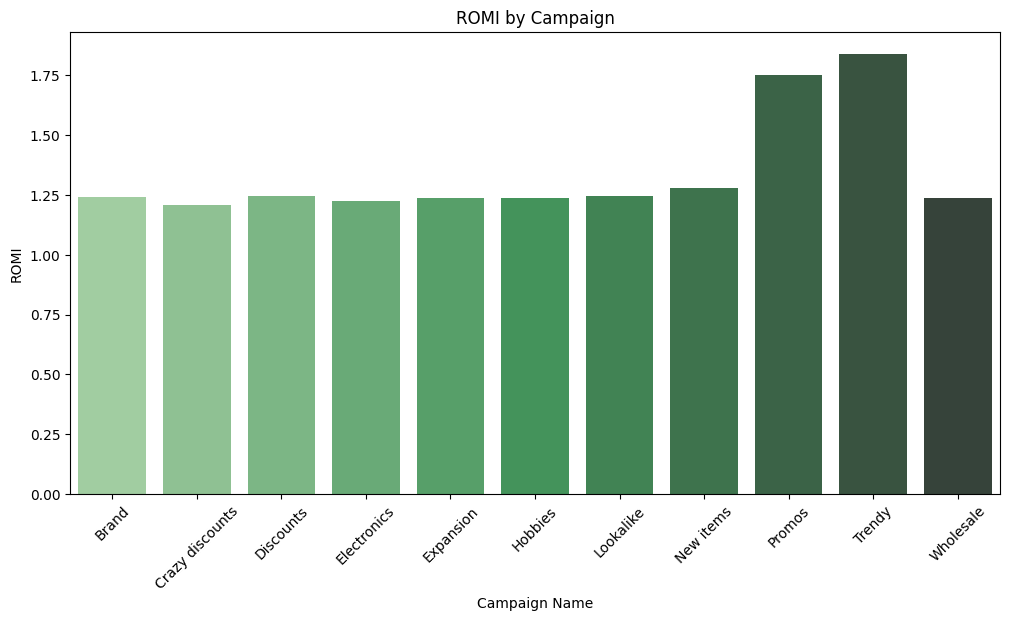

In [ ]:
# 2. Grouping data by campaign and plotting total spend and ROMI by campaign
grouped_campaign = df.groupby('campaign_name').agg({'total_spend': 'sum', 'romi': 'mean'}).reset_index()
print(grouped_campaign)

# Plotting total spend by campaign
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_campaign, x='campaign_name', y='total_spend', palette='Blues_d')
plt.title('Total Advertising Spend by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.show()

# Plotting ROMI by campaign
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_campaign, x='campaign_name', y='romi', palette='Greens_d')
plt.title('ROMI by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-ddb07fad8a41>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2021, x='campaign_name', y='romi', palette='Set3')


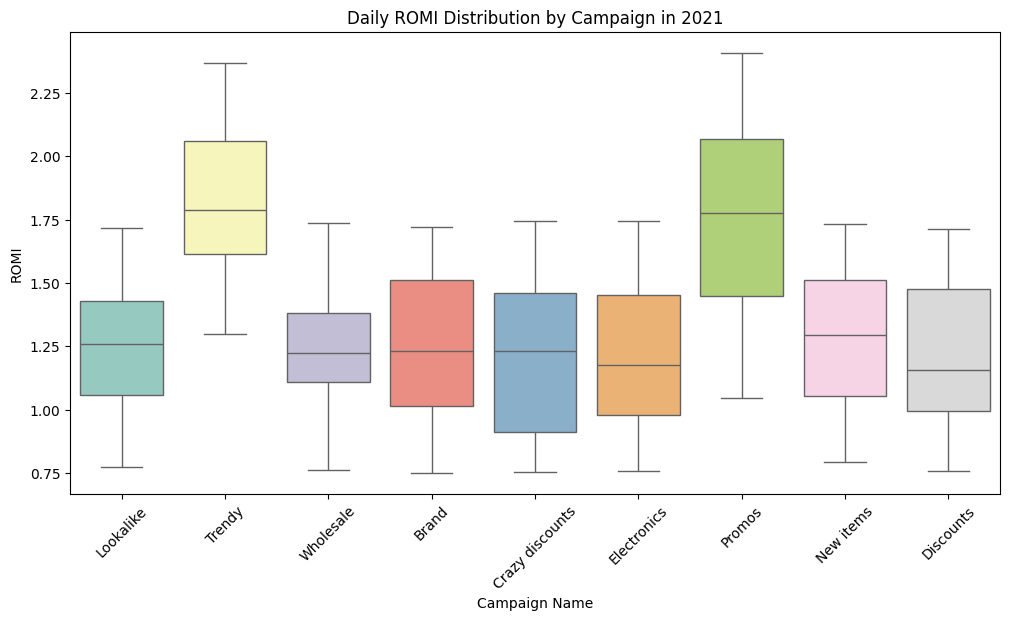

In [ ]:
# 3. Boxplot to determine distribution of daily ROMI by campaign
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2021, x='campaign_name', y='romi', palette='Set3')
plt.title('Daily ROMI Distribution by Campaign in 2021')
plt.xlabel('Campaign Name')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.show()

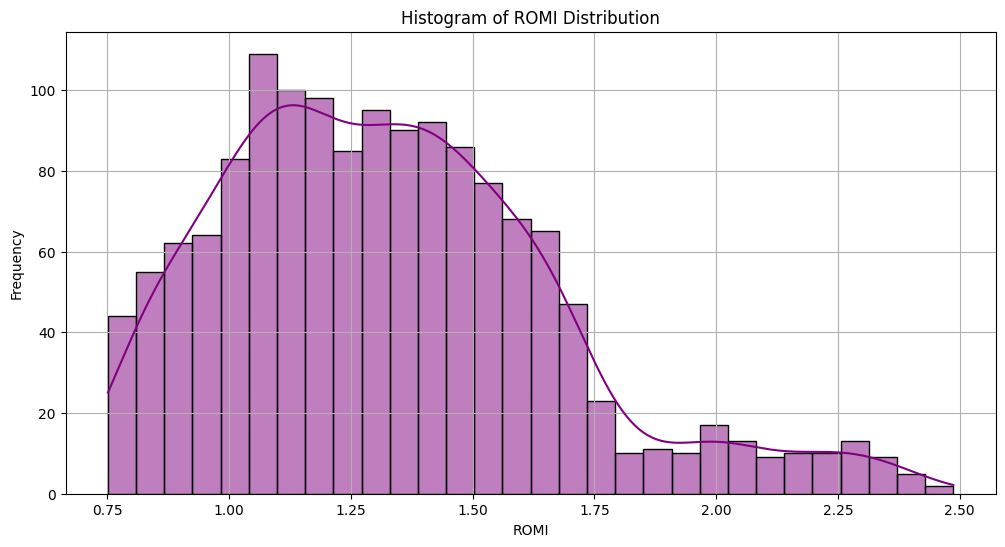

In [ ]:
# 4. Histogram of ROMI distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['romi'].dropna(), kde=True, bins=30, color='purple')
plt.title('Histogram of ROMI Distribution')
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

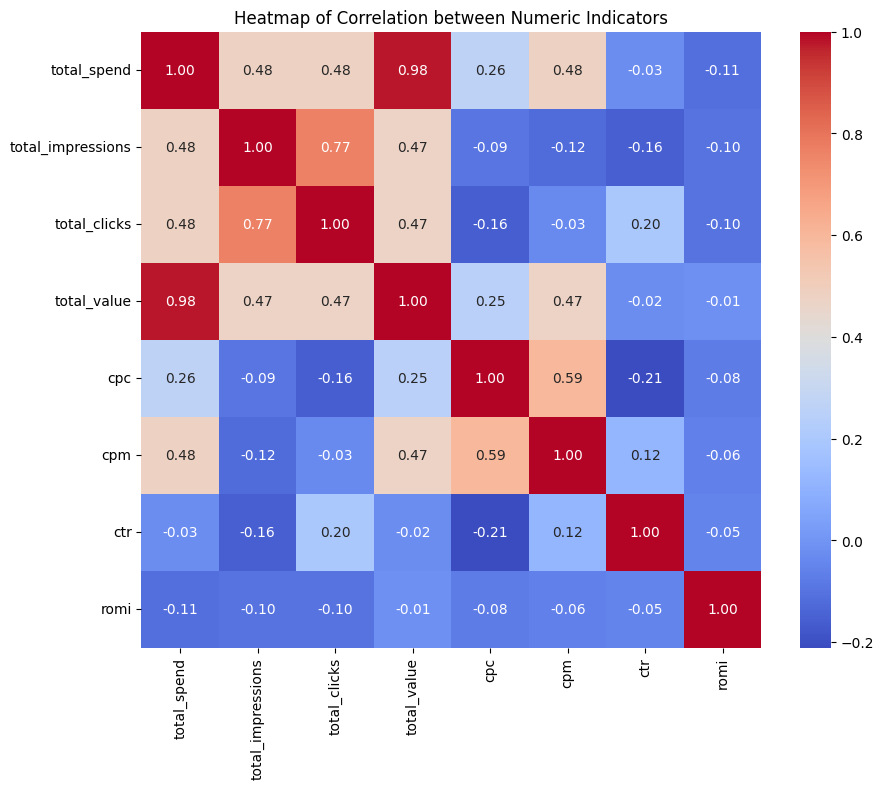

In [ ]:
# 5. Heatmap of correlation between all numeric indicators

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation between Numeric Indicators')
plt.show()


<Figure size 1000x600 with 0 Axes>

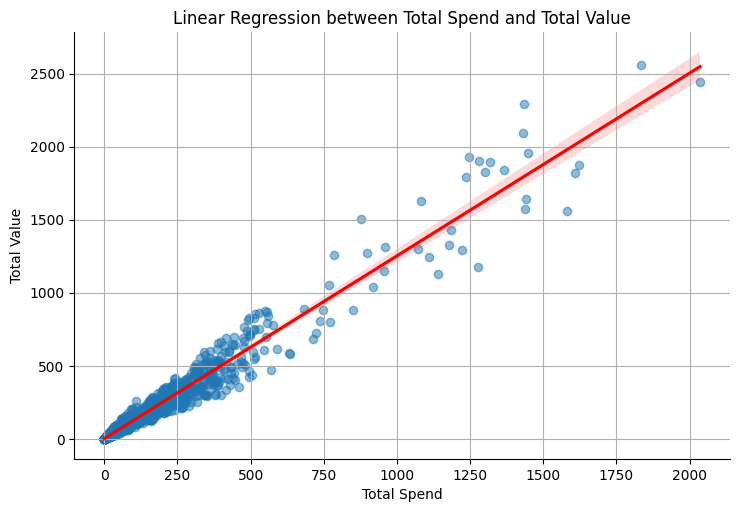

In [ ]:
# 6. Linear regression plot between total_spend and total_value
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='total_spend', y='total_value', aspect=1.5, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Linear Regression between Total Spend and Total Value')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()